In [228]:
%matplotlib inline

import pickle
import collections
import os, random
import pandas as pd
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

dataPath = '../PedestrianData/IntentionData'
pd.__version__

'0.24.2'

#### Loading the demographic and environmental data from pickle:

In [673]:
data = pd.read_pickle('../PedestrianData/ALLDATA.pkl')

#### Removing folder names from file values (some files are in subfolders):

In [679]:
for i in range(len(data)):
    value = data['File'].values[i].split('/')
    data['File'].values[i] = value[len(value) - 1]
    
data[['File','Wait Time (s)']].sample(10)

,File,Wait Time (s)
2089,50--2018-28-6--17-19-26.txt,4.19622
1279,54--2018-17-7--13-05-54.txt,0
601,10--2018-29-5--19-04-52.txt,0
628,41--2018-09-5--17-53-25.txt,1.86663
214,39--2018-04-7--17-19-55.txt,3.86123
1600,67--2018-06-6--13-17-42.txt,1.15665
906,34--2018-28-8--15-45-43.txt,2.22076
1528,41--2018-10-7--12-15-08.txt,2.21663
2438,59--2018-07-7--14-56-16.txt,1.89999
541,74--2018-08-5--17-14-22.txt,3.9573


### Reading three sample trials

In [90]:
while True:
    file1 = random.choice(os.listdir(dataPath))    
    file2 = random.choice(os.listdir(dataPath))    
    file3 = random.choice(os.listdir(dataPath))    
    if (data.loc[data['File'] == file1]['Wait Time (s)'].empty
        or data.loc[data['File'] == file2]['Wait Time (s)'].empty
       or data.loc[data['File'] == file3]['Wait Time (s)'].empty):
        continue
    else:
        break

crossTime1 = data.loc[data['File'] == file1]['Wait Time (s)']
crossTime2 = data.loc[data['File'] == file2]['Wait Time (s)']
crossTime3 = data.loc[data['File'] == file3]['Wait Time (s)']

width1 = data.loc[data['File'] == file1]['Lane Width']
width2 = data.loc[data['File'] == file2]['Lane Width']
width3 = data.loc[data['File'] == file3]['Lane Width']

if(data.loc[data['File'] == file1]['One way'].item() == 1):
    lane1 = 'One Way'
else:
    lane1 = "Two Way"
    
if(data.loc[data['File'] == file2]['One way'].item() == 1):
    lane2 = 'One Way'
else:
    lane2 = "Two Way"
    
if(data.loc[data['File'] == file2]['One way'].item() == 1):
    lane3 = 'One Way'
else:
    lane3 = "Two Way"

print(dataPath + '/' + file1)
df1 = pd.read_csv(dataPath + '/' + file1, sep=",", header=None, 
                 names=["Time", 
                        "Pos_x", "Pos_y", "Pos_z", 
                        "Gaz_x", "Gaz_y", "Gaz_z", 
                        "Vel_x", "Vel_z",
                        "Acc_x", "Acc_z",
                        "Vel_Mag", "Acc_Mag",
                        "Vel_Ang", "Acc_Ang", "Gaz_Ang",
                        "Vel_Bin", "Acc_Bin", "Gaz_Bin", "Chg_Bin"          
                       ])
df2 = pd.read_csv(dataPath + '/' + file2, sep=",", header=None, 
                 names=["Time", 
                        "Pos_x", "Pos_y", "Pos_z", 
                        "Gaz_x", "Gaz_y", "Gaz_z", 
                        "Vel_x", "Vel_z",
                        "Acc_x", "Acc_z",
                        "Vel_Mag", "Acc_Mag",
                        "Vel_Ang", "Acc_Ang", "Gaz_Ang",
                        "Vel_Bin", "Acc_Bin", "Gaz_Bin", "Chg_Bin"
                       ])
df3 = pd.read_csv(dataPath + '/' + file3, sep=",", header=None, 
                 names=["Time", 
                        "Pos_x", "Pos_y", "Pos_z", 
                        "Gaz_x", "Gaz_y", "Gaz_z", 
                        "Vel_x", "Vel_z",
                        "Acc_x", "Acc_z",
                        "Vel_Mag", "Acc_Mag",
                        "Vel_Ang", "Acc_Ang", "Gaz_Ang",
                        "Vel_Bin", "Acc_Bin", "Gaz_Bin", "Chg_Bin"
                       ])

../PedestrianData/IntentionData/86--2018-04-7--11-42-55.txt


### Visualizing gaze directions over time 

31--2018-03-5--11-55-10.txt
81--2018-04-7--19-05-05.txt
53--2018-08-5--18-25-24.txt


Text(0.5, 0.98, '3 Sample Trials and Gaze Directions')

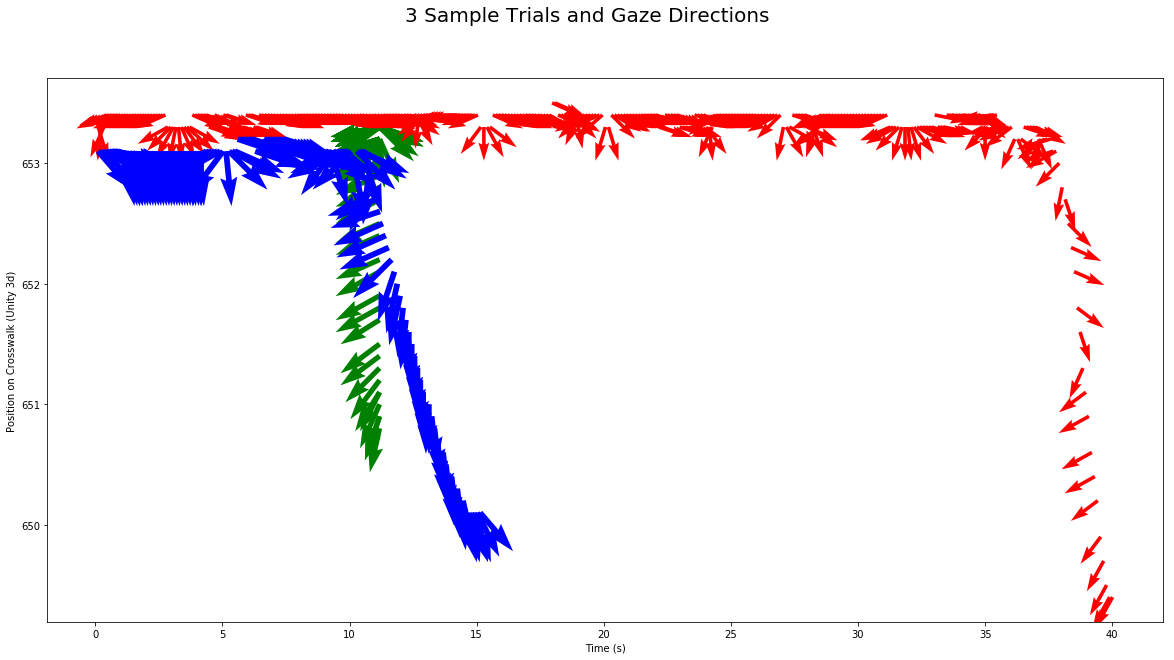

In [57]:
data_x = [crossTime1.tolist()[0], crossTime2.tolist()[0], crossTime3.tolist()[0]]
data_y = [648, 648, 648]
#plt.plot(data_x, data_y, 'or')

print(file1)
print(file2)
print(file3)
plt.figure(figsize=(20,10))
plt.quiver(df1["Time"], df1["Pos_z"], df1["Gaz_x"], df1["Gaz_z"], color='g')
plt.quiver(df2["Time"], df2["Pos_z"], df2["Gaz_x"], df2["Gaz_z"], color='r')
plt.quiver(df3["Time"], df3["Pos_z"], df3["Gaz_x"], df3["Gaz_z"], color='b')

plt.xlabel("Time (s)")
plt.ylabel("Position on Crosswalk (Unity 3d)")
plt.suptitle('3 Sample Trials and Gaze Directions', fontsize=20)

### Normalized histograms of the discretized directions for head poses and changes
#### Includes lane type and width

Green - 3.0 meter lanes - Two Way
Red - 2.75 meter lanes - One Way
Blue - 2.5 meter lanes - One Way


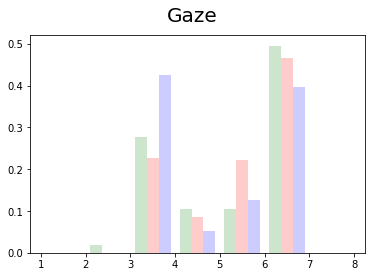

In [431]:
plt.hist([df1["Gaz_Bin"], df2["Gaz_Bin"], df3["Gaz_Bin"]], bins=[1, 2, 3, 4, 5, 6, 7, 8] , alpha=0.2, density=True, color=["green", "red", "blue"])

print("Green - " + str(width1.values[0]) + " meter lanes - " + lane1)
print("Red - " + str(width2.values[0]) + " meter lanes - " + lane2)
print("Blue - " + str(width3.values[0]) + " meter lanes - " + lane3)
plt.suptitle("Gaze", fontsize=20)
plt.show()

Green - 3.0 meter lanes - Two Way
Red - 2.75 meter lanes - One Way
Blue - 2.5 meter lanes - One Way


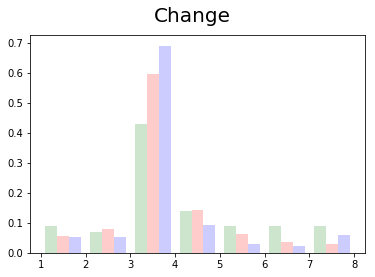

In [432]:
plt.hist([df1["Chg_Bin"], df2["Chg_Bin"], df3["Chg_Bin"]], bins=[1, 2, 3, 4, 5, 6, 7, 8] , alpha=0.2, density=True, color=["green", "red", "blue"])

print("Green - " + str(width1.values[0]) + " meter lanes - " + lane1)
print("Red - " + str(width2.values[0]) + " meter lanes - " + lane2)
print("Blue - " + str(width3.values[0]) + " meter lanes - " + lane3)
plt.suptitle("Change", fontsize=20)
plt.show()

### Clustering the data

In [664]:
files = os.listdir(dataPath)
hist_data = np.empty((len(files), 3), dtype=list)
for i in range(len(files)):
    count = 0
    file = dataPath + "/" + files[i]
    df = pd.read_csv(file, sep=",", header=None, 
                 names=["Time", 
                        "Pos_x", "Pos_y", "Pos_z", 
                        "Gaz_x", "Gaz_y", "Gaz_z", 
                        "Vel_x", "Vel_z",
                        "Acc_x", "Acc_z",
                        "Vel_Mag", "Acc_Mag",
                        "Vel_Ang", "Acc_Ang", "Gaz_Ang",
                        "Vel_Bin", "Acc_Bin", "Gaz_Bin", "Chg_Bin"          
                       ])
    try:
        hist_data[i, 0] = (data.loc[data['File'] == files[i]])["Wait Time (s)"].item()
    except:
        hist_data[i, 0] = 0
    finally:
        hist_data[i, 1] = np.asarray(df["Gaz_Bin"])
        hist_data[i, 2] = np.asarray(df["Chg_Bin"])

In [665]:
np.unique([str(datum.dtype) for datum in hist_data[:,1]])

array(['int64'], dtype='<U5')

In [724]:
hist_data[:,1]

array([array([6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 5, 5, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 4, 4, 5, 5, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 5, 5, 5, 5, 5, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       4, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5], dtype=int64),
       array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 6,
       6, 6, 6, 6, 6, 6, 5, 4, 3, 3, 3, 3, 3, 3, 4, 5, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 

In [723]:
from sklearn.cluster import KMeans

data_ = np.array([np.histogram(datum, bins=[1, 2, 3, 4, 5, 6, 7, 8])[0] for datum in hist_data[:, 1]])
km = KMeans(n_clusters = 2, init="k-means++").fit(data_)  # 10 clusters
print(km.cluster_centers_)  # cluster centres, 10x8 array 

[[1.46425073e-01 6.05778648e-01 4.99637610e+01 1.57252693e+01
  2.61777669e+01 7.41488737e+01 2.15523996e+00]
 [1.87725632e-01 1.19494585e+00 6.25198556e+01 1.90722022e+01
  3.65920578e+01 2.58711191e+02 7.43682310e+00]]


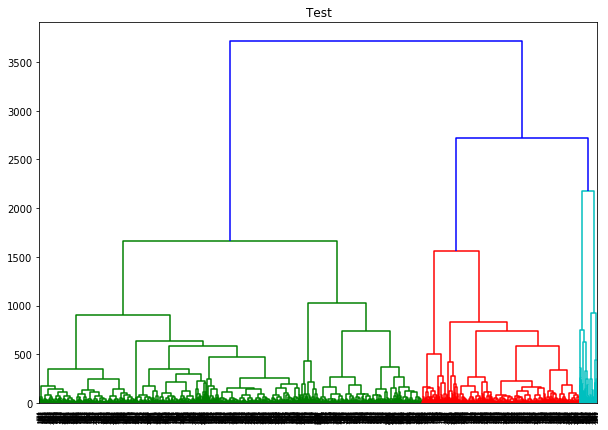

In [716]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))  
plt.title("Test")  
dend = shc.dendrogram(shc.linkage(data_, method='ward'))  

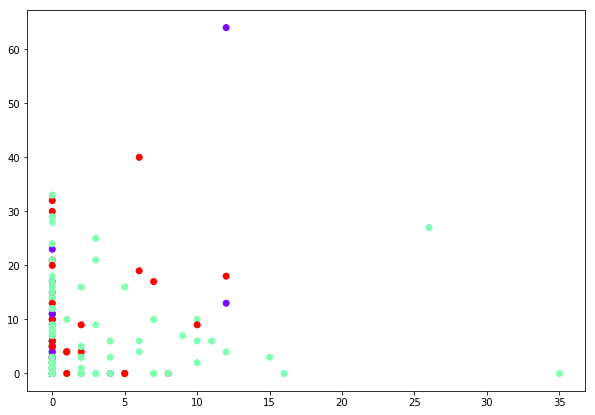

In [720]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data_)
plt.figure(figsize=(10, 7))  
plt.scatter(data_[:,0], data_[:,1], c=cluster.labels_, cmap='rainbow')  

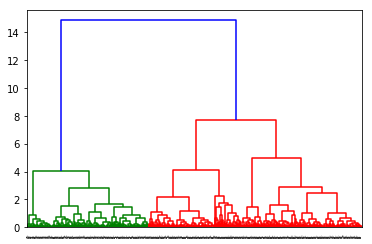

<Figure size 1440x720 with 0 Axes>

In [609]:
Z = linkage(data, 'ward')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=1.,  # font size for the x axis labels
)
plt.figure(figsize=(20,10))
plt.show()

In [612]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data)  
print(cluster.labels_)  


[1 1 0 ... 0 1 0]


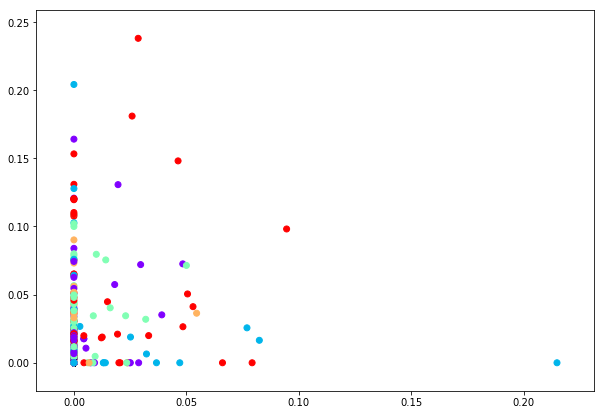

In [628]:
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data)
plt.figure(figsize=(10, 7))  
plt.scatter(data[:,0], data[:,1], c=cluster.labels_, cmap='rainbow')  